# EDA

In [1]:
import os
import sys
sys.path.append('..')

import missingno as msno
import pandas as pd

import my_ds_tools

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
PERSON_DATA_PATH = os.path.join('..', 'data', 'raw', 'person.csv')
ACTION_TRAIN_PATH = os.path.join('..', 'data', 'raw', 'action_train.csv')
ACTION_TEST_PATH = os.path.join('..', 'data', 'raw', 'action_test.csv')

---

In [4]:
person_data = pd.read_csv(
    PERSON_DATA_PATH,
    index_col=0,
    parse_dates=['date'],
    dtype={
        'char_1': 'category',
        'char_2': 'category',
        'char_3': 'category',
        'char_4': 'category',
        'char_5': 'category',
        'char_6': 'category',
        'char_7': 'category',
        'char_8': 'category',
        'char_9': 'category',
    },
)
person_data.head()

,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [5]:
person_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   person_id  189118 non-null  object        
 1   char_1     189118 non-null  category      
 2   group_1    189118 non-null  object        
 3   char_2     189118 non-null  category      
 4   date       189118 non-null  datetime64[ns]
 5   char_3     189118 non-null  category      
 6   char_4     189118 non-null  category      
 7   char_5     189118 non-null  category      
 8   char_6     189118 non-null  category      
 9   char_7     189118 non-null  category      
 10  char_8     189118 non-null  category      
 11  char_9     189118 non-null  category      
 12  char_10    189118 non-null  bool          
 13  char_11    189118 non-null  bool          
 14  char_12    189118 non-null  bool          
 15  char_13    189118 non-null  bool          
 16  char_14    189118 non-nul

---

In [6]:
action_train = pd.read_csv(
    ACTION_TRAIN_PATH,
    index_col=0,
    parse_dates=['date'],
    dtype={
        'action_type': 'category',
        'char_1': 'category',
        'char_2': 'category',
        'char_3': 'category',
        'char_4': 'category',
        'char_5': 'category',
        'char_6': 'category',
        'char_7': 'category',
        'char_8': 'category',
        'char_9': 'category',
        'char_10': 'category',
    },
)
action_train.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [7]:
action_train['result'].mean()

0.4439543965728709

In [8]:
action_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   person_id    object        
 1   action_id    object        
 2   date         datetime64[ns]
 3   action_type  category      
 4   char_1       category      
 5   char_2       category      
 6   char_3       category      
 7   char_4       category      
 8   char_5       category      
 9   char_6       category      
 10  char_7       category      
 11  char_8       category      
 12  char_9       category      
 13  char_10      category      
 14  result       int64         
dtypes: category(11), datetime64[ns](1), int64(1), object(2)
memory usage: 109.3+ MB


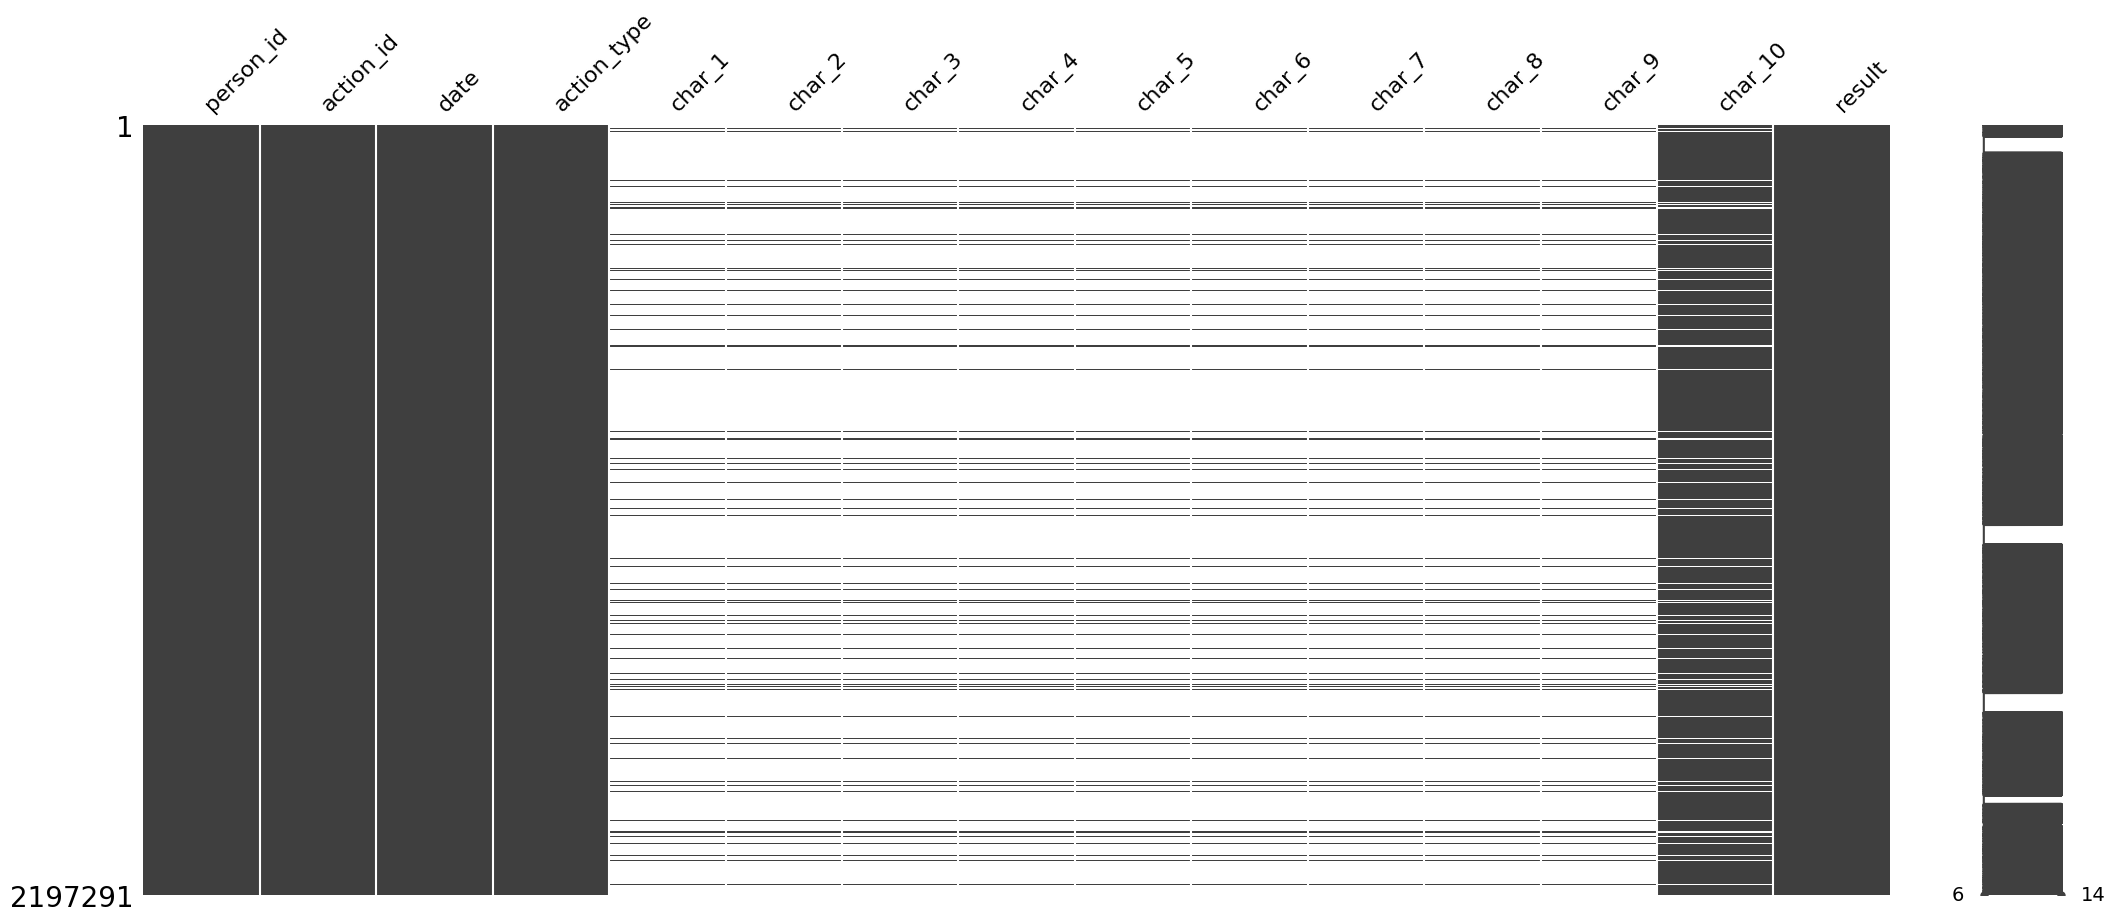

In [9]:
ax = msno.matrix(action_train)

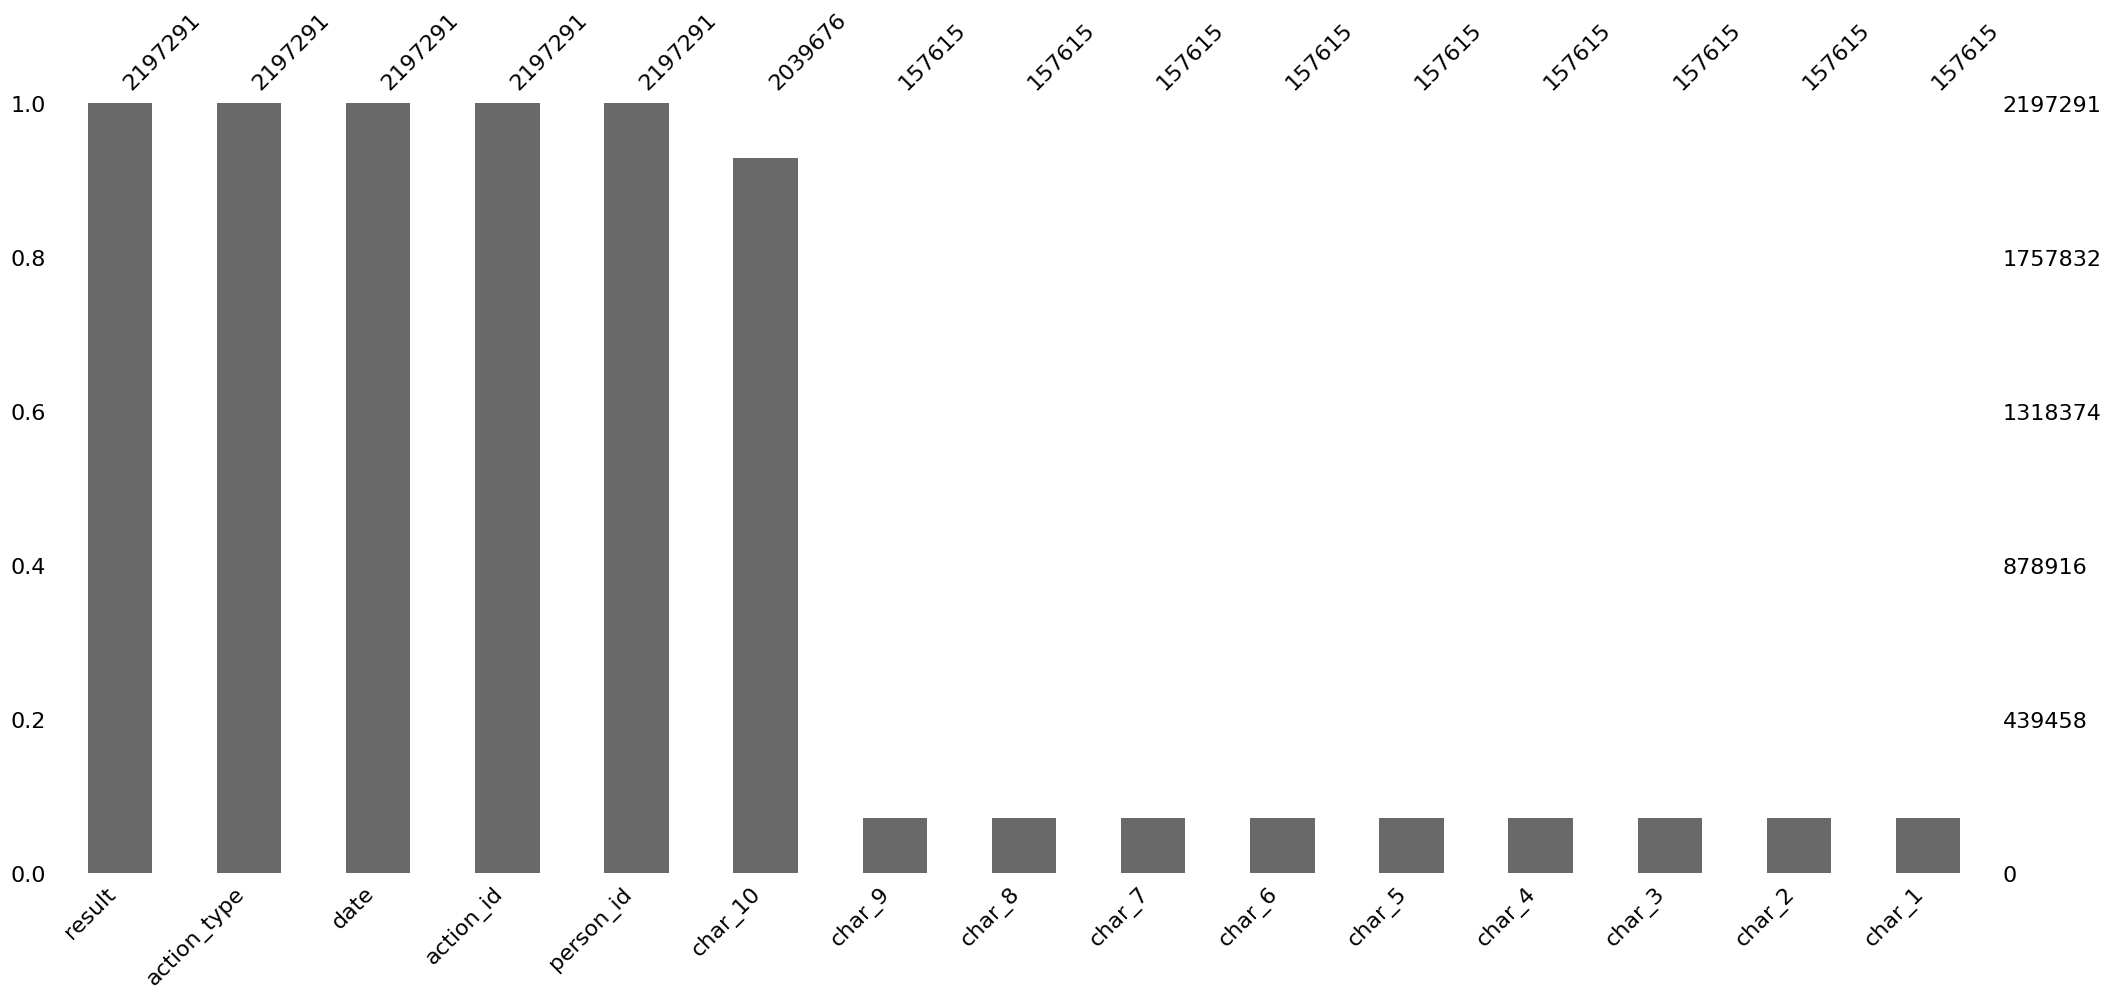

In [10]:
ax = msno.bar(action_train, sort='descending')

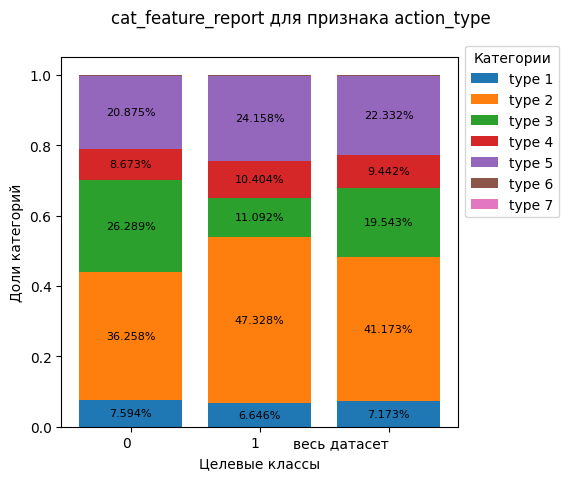

In [11]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='action_type', target_colname='result')

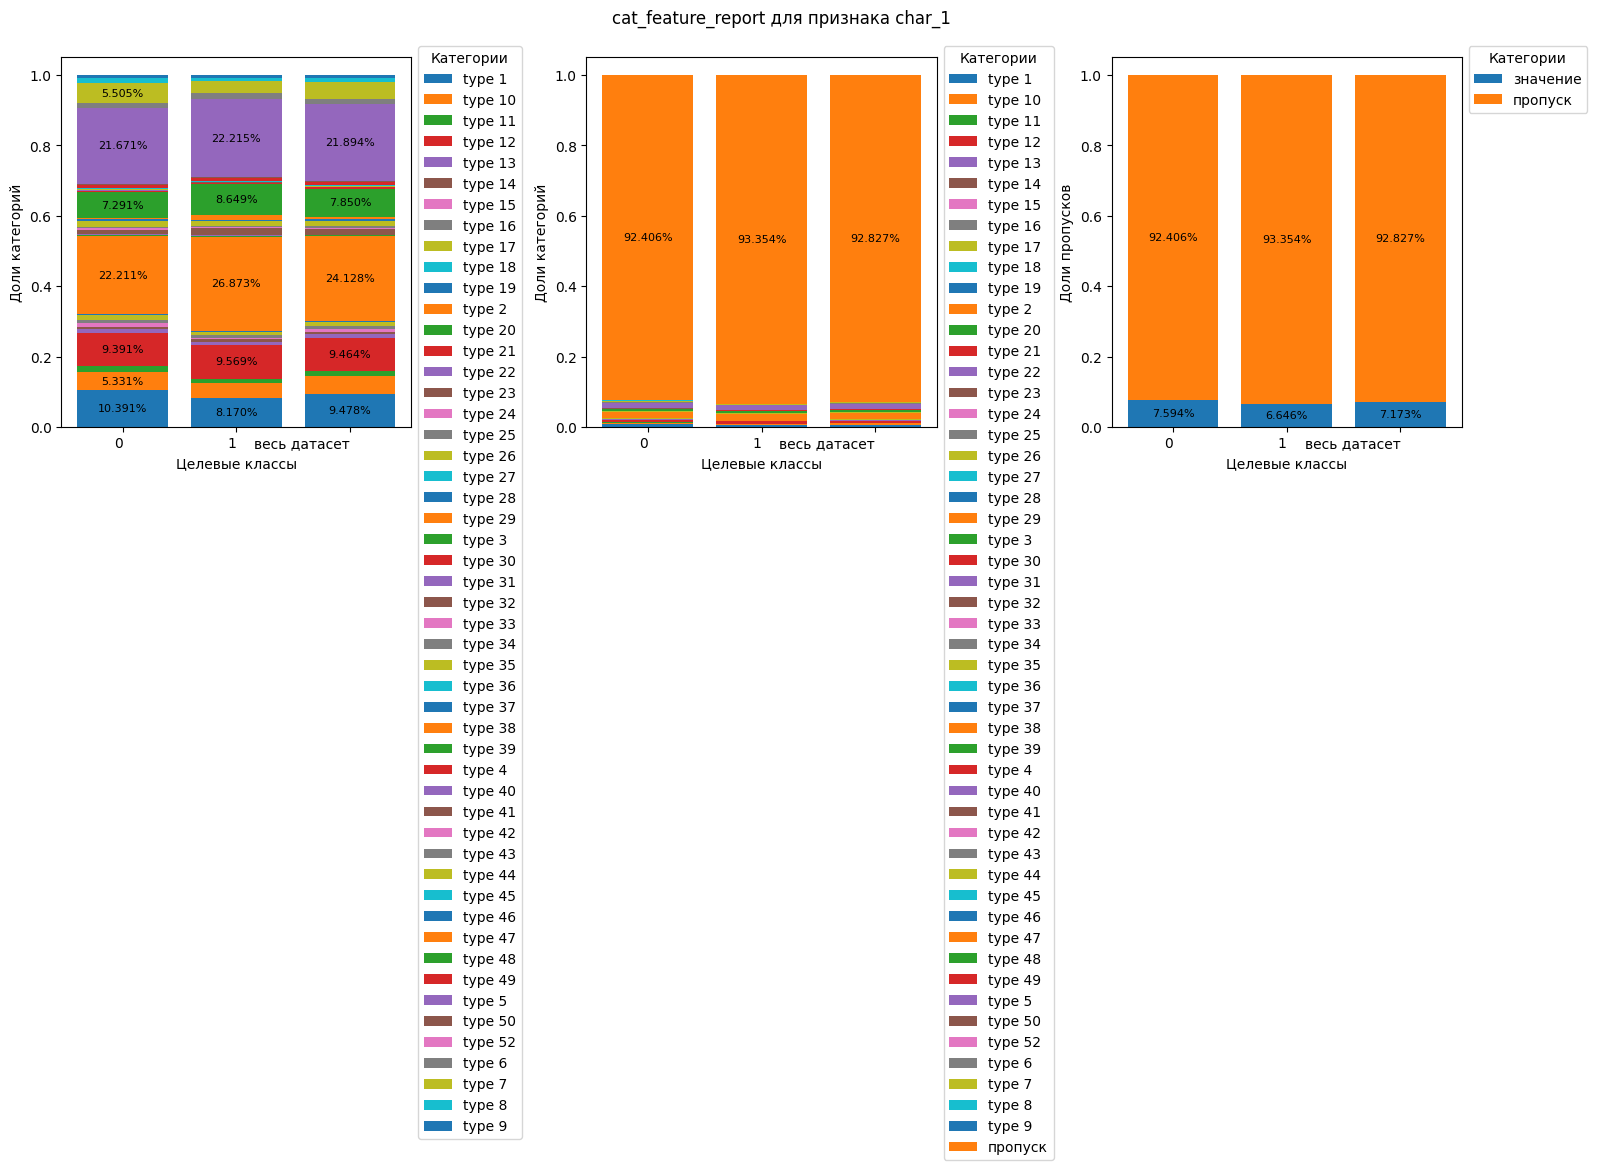

In [12]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_1', target_colname='result')

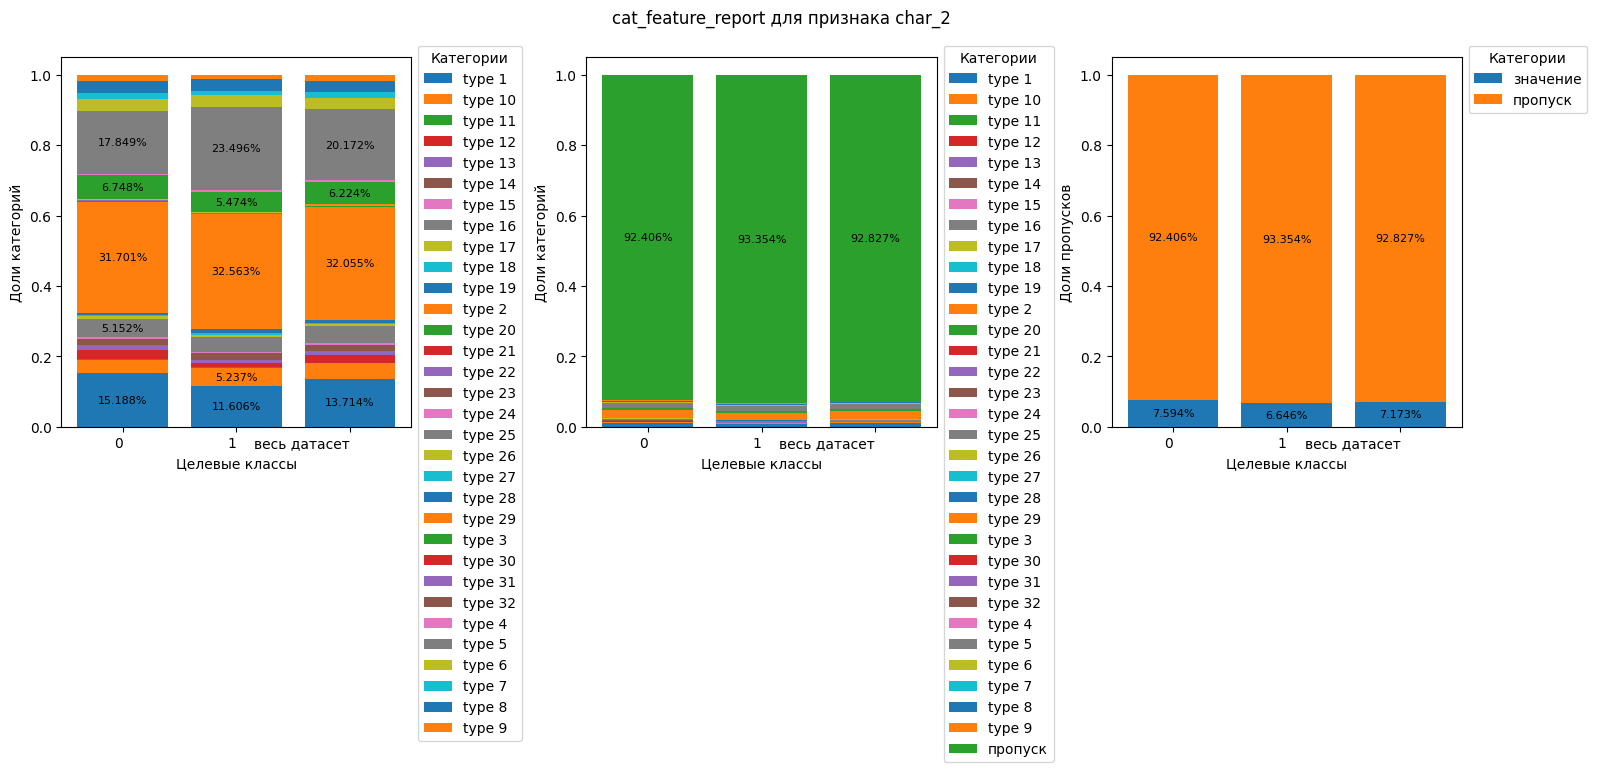

In [13]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_2', target_colname='result')

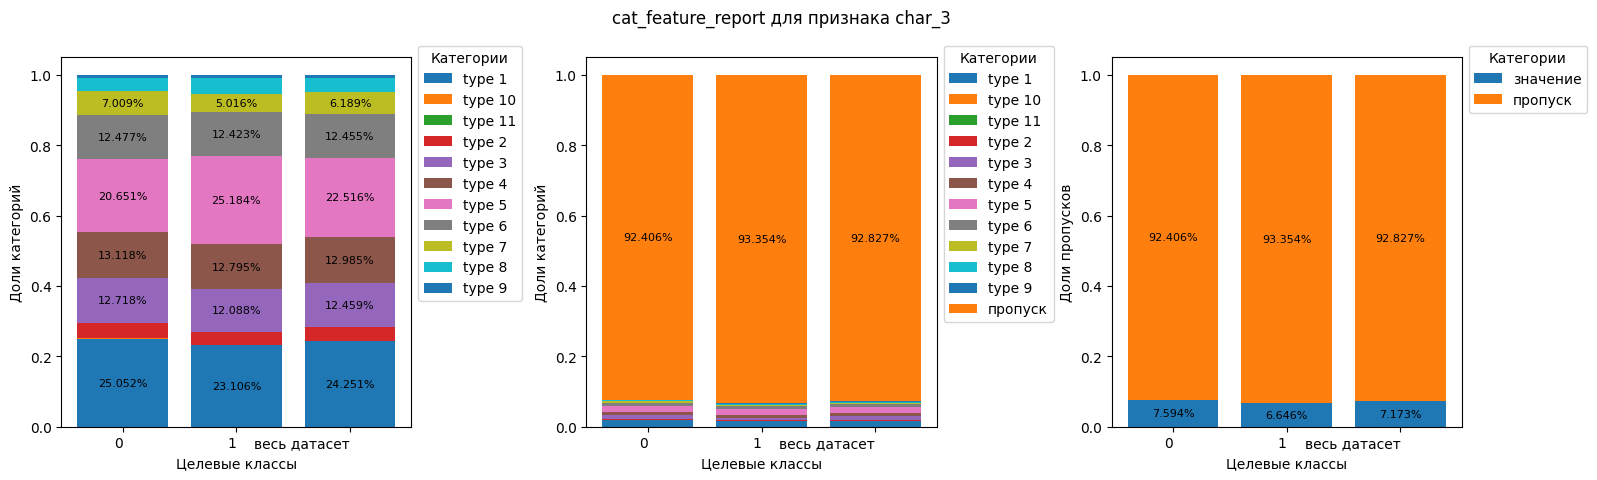

In [14]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_3', target_colname='result')

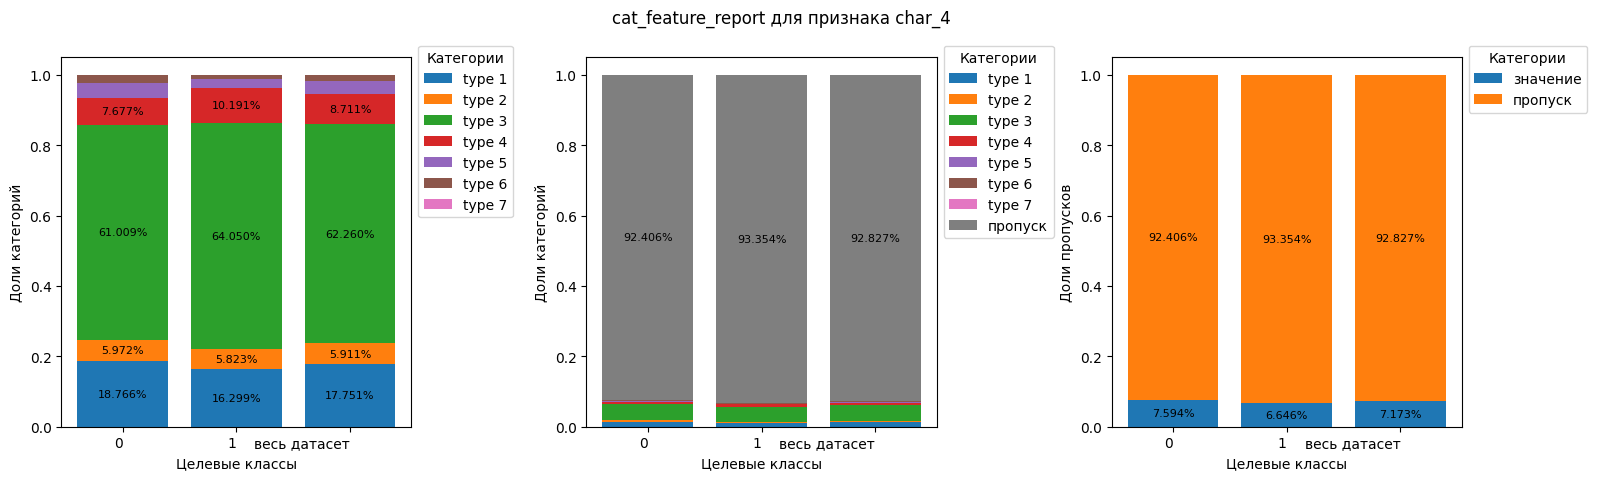

In [15]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_4', target_colname='result')

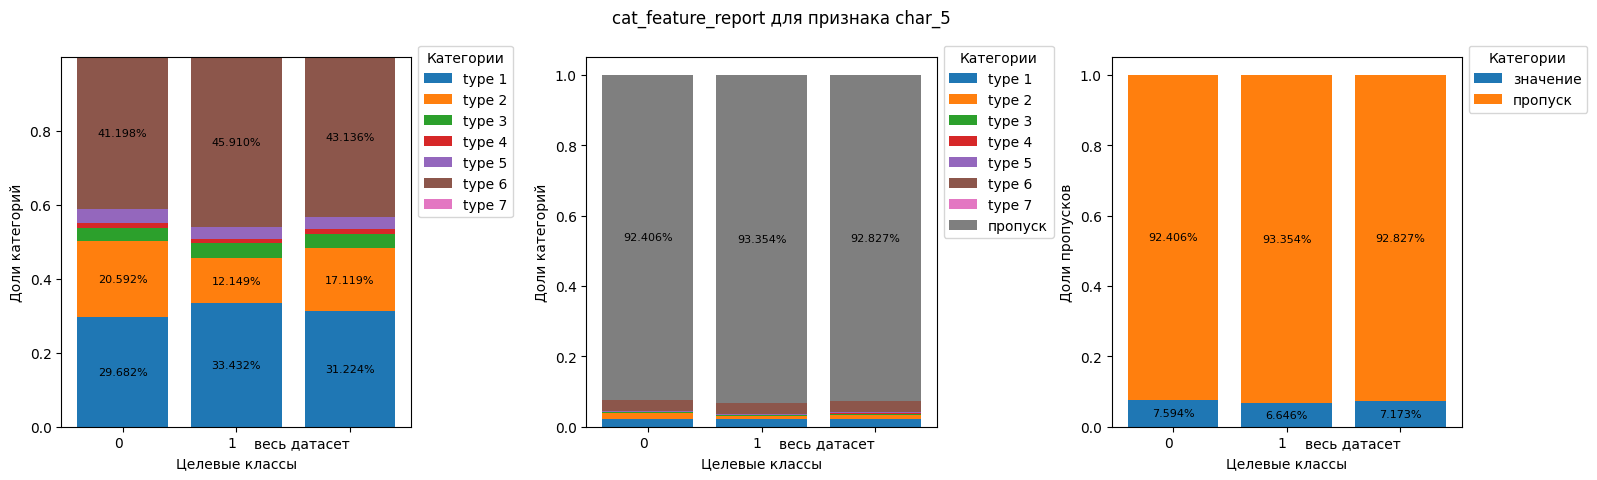

In [16]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_5', target_colname='result')

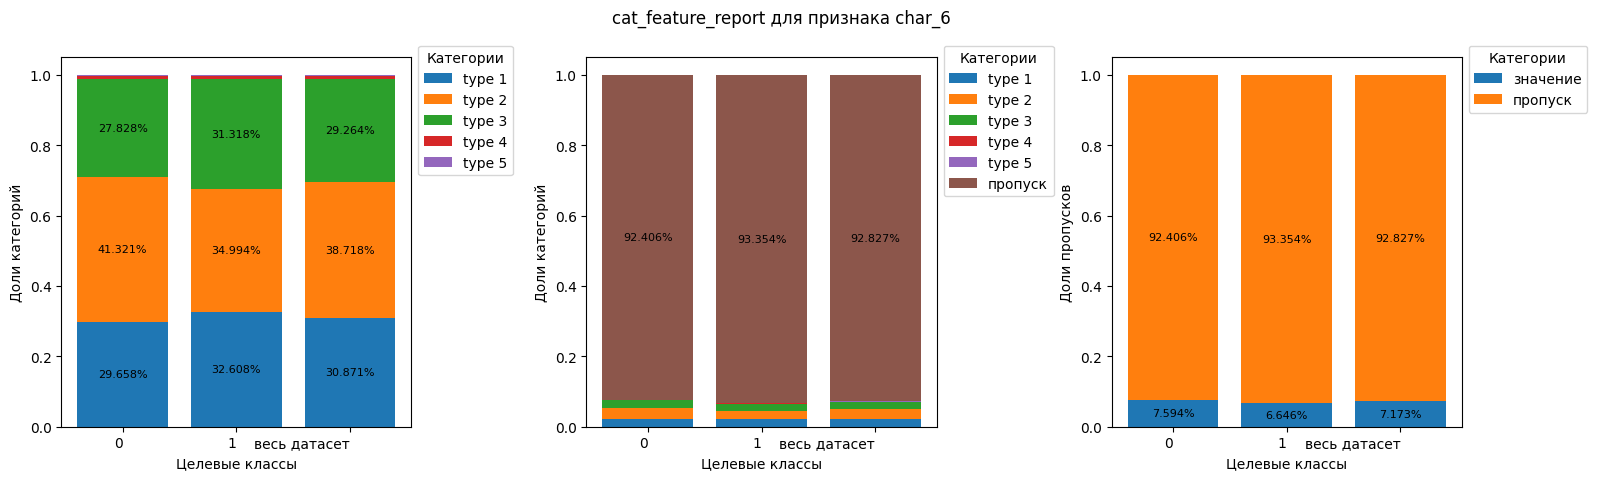

In [17]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_6', target_colname='result')

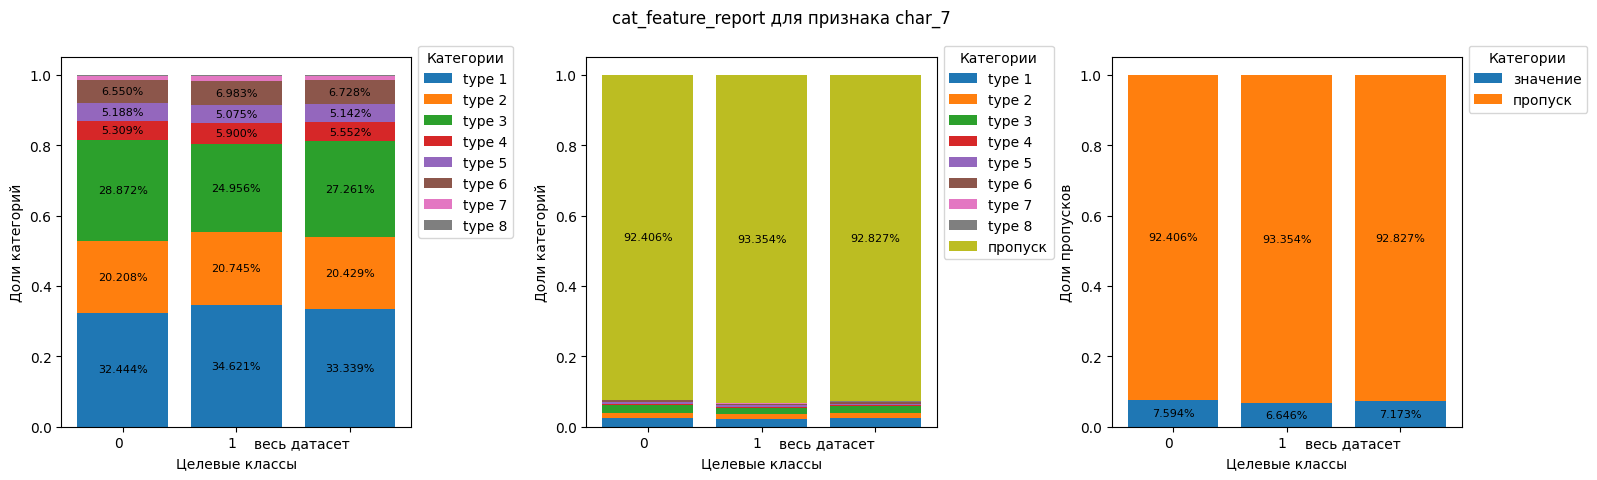

In [18]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_7', target_colname='result')

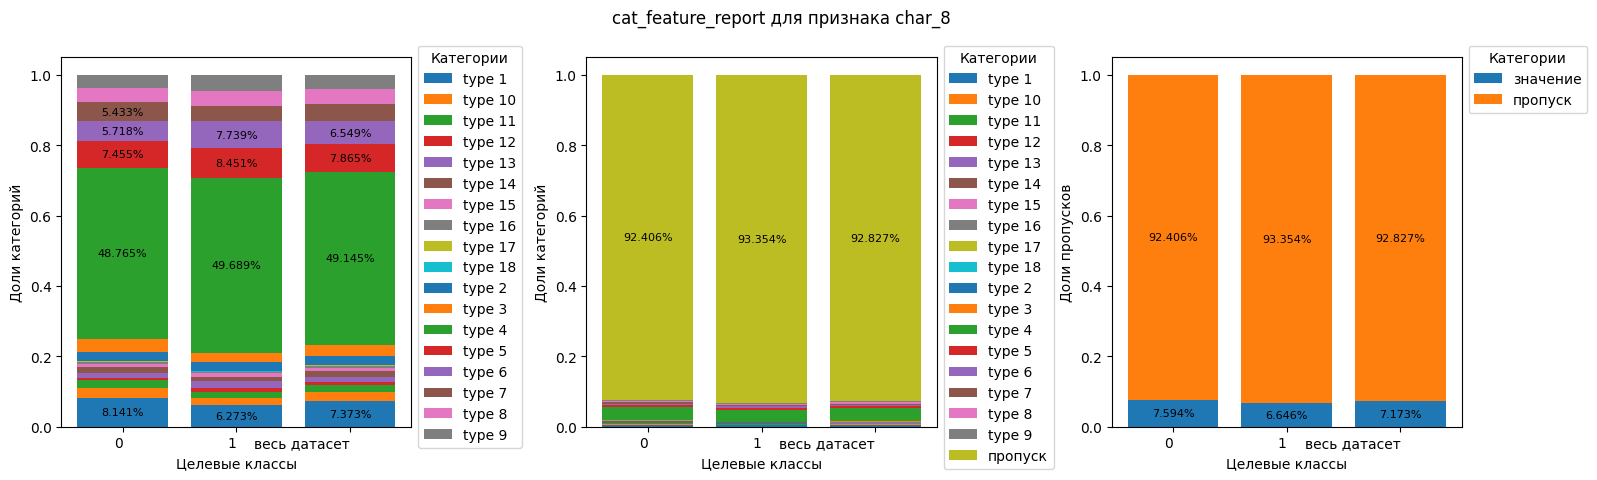

In [19]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_8', target_colname='result')

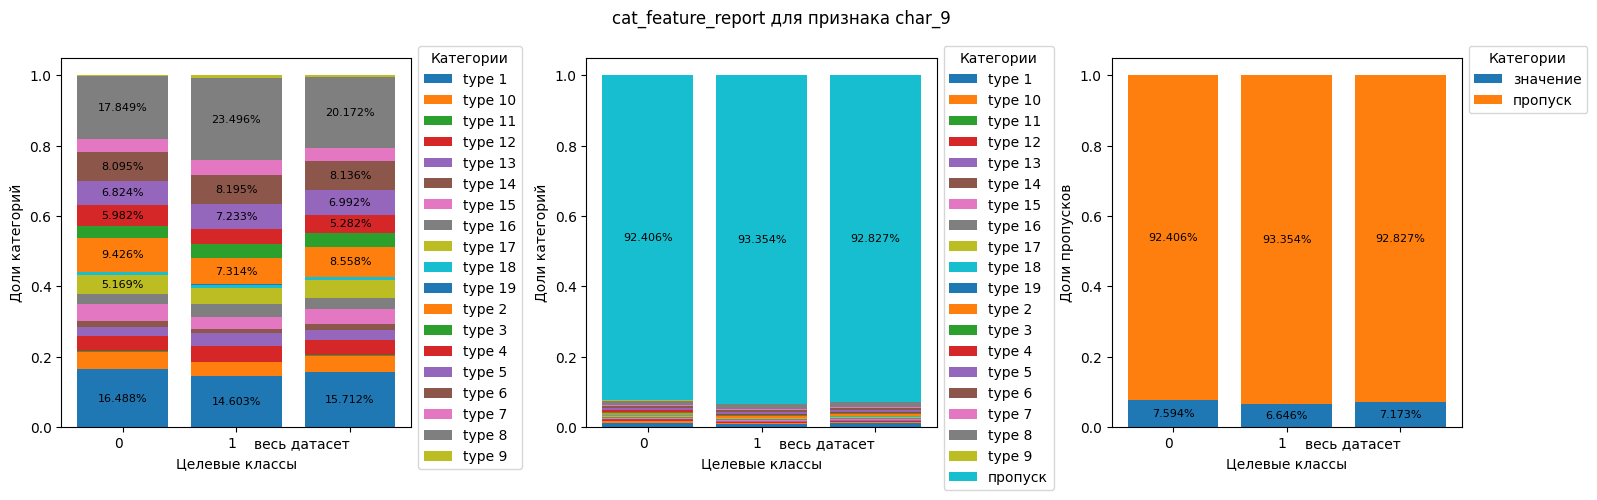

In [20]:
fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_9', target_colname='result')

In [21]:
# fig, ax = my_ds_tools.eda.cat_feature_report(action_train, feature_colname='char_10', target_colname='result')
action_train['char_10'].nunique()

6515

In [39]:
action_train.groupby('person_id')['action_id'].count().value_counts().head(50)

action_id
1     24726
2     23095
3     13576
5     10298
4      9783
6      5908
7      5559
8      4932
9      3842
10     2886
11     2610
19     2397
12     2286
16     2143
14     2133
18     2057
22     2041
13     1894
21     1852
17     1790
20     1700
15     1639
24     1219
23     1146
25     1026
26      887
27      858
28      703
29      663
31      587
32      576
30      544
34      526
33      520
35      470
36      465
37      452
38      390
40      373
42      363
41      361
39      353
43      316
46      294
44      291
45      283
47      265
48      242
50      242
49      227
Name: count, dtype: int64

---

In [23]:
action_test = pd.read_csv(
    ACTION_TEST_PATH,
    index_col=0,
    parse_dates=['date'],
    dtype={
        'action_type': 'category',
        'char_1': 'category',
        'char_2': 'category',
        'char_3': 'category',
        'char_4': 'category',
        'char_5': 'category',
        'char_6': 'category',
        'char_7': 'category',
        'char_8': 'category',
        'char_9': 'category',
        'char_10': 'category',
    },
)
action_test.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015
